<a href="https://colab.research.google.com/github/RuobingBai/Detection-of-Vulnerable-Individuals-Using-NLP-of-Helpline-Records/blob/main/Deep_learning_model(1)_Using_unstructured_data_as_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Packages**

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
! pip install imblearn
! pip install delayed
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import unicodedata
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist
! pip install contractions
import contractions
from wordcloud import WordCloud

# Display full output rather than just the last line of output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Set up for where to save the figures
import os
PROJECT_ROOT_DIR = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **Load Cleaned Data**

In [ ]:
import time
start = time.time()
#read data in chunks of 1 million rows at a time
chunk = pd.read_csv('Cleaned.csv',chunksize=1000000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")
data1 = pd.concat(chunk)

# data1 = pd.read_csv('Cleaned.csv')

Read csv with chunks:  0.014369964599609375 sec


In [ ]:
data1 = data1.dropna(subset = ["Description"])

In [ ]:
data1

,IP Address (hashed),ID,Case Number,Case Origin,Case Reason,Subject,Description,Break Confidentiality?,Main Issue Category,Issues mentioned,Initial Feeling,Age,County,Region,Gender,Sexuality,Ethnicity,Disabled,Religion,Employment Status,Date/Time Opened,How do they prefer help?,What type of help?,Were signposts offered?,Description1,tokenized,pos_tags,wordnet_pos,lemmatized,lemma_str
0,dbd57d182ed3da1ac3a97e166b31d077,c4d6738a2e3a29fbc384c9389c2c626fEQdLE,58884,Webchat,help for themselves,depression and feeling suicidal,yp feeling suicidal difficulty emotional regul...,0,Mental Health,Debt; Depression/Low Mood; Feelings and Emotio...,Depressed,20,NaN,London,Female,Bisexual,White English/Welsh/Scottish/Northern Irish/Br...,No,No Religion,Student,2020/10/22,Chat; Email; Face to Face; Online,Counselling; Emotional Support,Yes,yp feeling suicidal difficulty emotional regul...,"['yp', 'feeling', 'suicidal', 'difficulty', 'e...","[('yp', 'RB'), ('feeling', 'VBG'), ('suicidal'...","[('yp', 'r'), ('feeling', 'v'), ('suicidal', '...","['yp', 'feel', 'suicidal', 'difficulty', 'emot...",yp feel suicidal difficulty emotional regulati...
1,01f4a991f5c23ae9a7854c304a7600ed,a38298491bfe475e250829c22ee087a1bDpx,42333,Webchat,help for themselves,anxiety,yp waiting trauma team discuss past experience...,0,Mental Health,Anxiety; Emotional Abuse; Feelings and Emotions,Anxious; Down,15,Not Known,Yorkshire and the Humber,Female,NaN,White English/Welsh/Scottish/Northern Irish/Br...,NaN,NaN,NaN,2020/2/19,Online,Not Sure,Yes,yp waiting trauma team discuss past experience...,"['yp', 'waiting', 'trauma', 'team', 'discuss',...","[('yp', 'RB'), ('waiting', 'VBG'), ('trauma', ...","[('yp', 'r'), ('waiting', 'v'), ('trauma', 'n'...","['yp', 'wait', 'trauma', 'team', 'discus', 'pa...",yp wait trauma team discus past experience emo...
2,fa5cd7dbfa3b302b8e0457a577338496,25f693b8c960df27645a352d4120d042EWFK,43385,Webchat,help for themselves,lonely,yp lonely feels like suffocating referred chil...,0,Mental Health,Mental Health and Wellbeing; Sexuality/sexual ...,Lonely,18,Not Known,North East England,Male,NaN,Pakistani,NaN,NaN,NaN,2020/3/11,Chat; Online,Not Sure,Yes,yp lonely feels like suffocating referred chil...,"['yp', 'lonely', 'feels', 'like', 'suffocating...","[('yp', 'NN'), ('lonely', 'RB'), ('feels', 'NN...","[('yp', 'n'), ('lonely', 'r'), ('feels', 'n'),...","['yp', 'lonely', 'feel', 'like', 'suffocate', ...",yp lonely feel like suffocate referred childli...
3,ff08050e693ee76b9d14b297a4b6a4b0,527e102ad2ac164dffda3156aafa29aabBGx,43751,Webchat,help for themselves,suicidal thoughts,yp experiencing bad flashbacks abused child do...,0,Mental Health,Thoughts of suicide/suicidal ideation; Thought...,Depressed,24,Not Known,Yorkshire and the Humber,Female,NaN,White English/Welsh/Scottish/Northern Irish/Br...,NaN,NaN,NaN,2020/3/18,We didn?t ask,We didn?t ask,No,yp experiencing bad flashbacks abused child do...,"['yp', 'experiencing', 'bad', 'flashbacks', 'a...","[('yp', 'NN'), ('experiencing', 'VBG'), ('bad'...","[('yp', 'n'), ('experiencing', 'v'), ('bad', '...","['yp', 'experience', 'bad', 'flashback', 'abus...",yp experience bad flashback abuse child domest...
4,cbb1b36513d87e942423ca51a1e428fe,27785f745b74fb8b2e9c95e7b0fbfbd1ac7h,40587,Webchat,help for themselves,depressed,yp feeling depressed experienced physical abus...,0,Mental Health,Mental Health and Wellbeing; Physical Abuse,Alone,23,Not Known,East of England,Female,NaN,White English/Welsh/Scottish/Northern Irish/Br...,NaN,NaN,NaN,2020/1/15,Face to Face,Not Sure,Yes,yp feeling depressed experienced physical abus...,"['yp', 'feeling', 'depressed', 'experienced', ...","[('yp', 'RB'), ('feeling', 'VBG'), ('depressed...","[('yp', 'r'), ('feeling', 'v'), ('depressed', ...","['yp', 'feel', 'depress', 'experienced', 'phys...",yp feel depress experienced physical abuse mon...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,"fc13

## **Machine Learning Task**

## **Input type 1. Using CounterVectorizer：**It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
sentences = data1['lemma_str'].values
y = data1['Break Confidentiality?'].values

# Split into train and validation set
sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=0, stratify=y)

### ***1.1 Using Logistic Regression***

In [ ]:
# Use BOW model to vectorize the sentences
vectorizer = CountVectorizer()
vectorizer.fit(sentence_train)

x_train = vectorizer.transform(sentence_train).toarray()
x_test  = vectorizer.transform(sentence_test).toarray()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# Smooth the unbalanced data
smo = SMOTE()

# Only need to balance the training data, but you can't use a fit method to a string
x_train, y_train = smo.fit_resample(x_train, y_train)

# Check again the balance of dataset
print('Counter(y_train)\n',Counter(y_train)) # Employ Counter()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter(y_train)
 Counter({0: 8245, 1: 8245})


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Recall Score 72.22%
Precision Score: 54.93%


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC_AUC_Curve')

Text(0.7, 0.3, 'AUC≈0.853')

Saving figure logclassifier


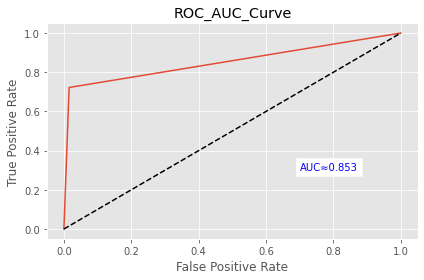

ROC_AUC_Score: 85.34%


In [ ]:
# finally put the training data into logistic regression model
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_test_pred = classifier.predict(x_test)

# Show a precision and recall metrics
print("Recall Score","{:.2%}".format(recall_score(y_test, y_test_pred)))
print("Precision Score:","{:.2%}".format((precision_score(y_test, y_test_pred))))

# Check the ROC curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC_Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.text(0.7,0.3,"AUC≈0.853", color="blue", backgroundcolor="white")
save_fig("logclassifier")
plt.show()

# Print the AUC
print("ROC_AUC_Score:","{:.2%}".format(roc_auc_score(y_test, y_test_pred)))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
print('Accuracy:', "{:.2%}".format(accuracy_score(y_test, y_test_pred)))

# precision tp / (tp + fp)
print("Precision:", "{:.2%}".format(precision_score(y_test, y_test_pred)))


# recall: tp / (tp + fn)
print("Recall:", "{:.2%}".format(recall_score(y_test, y_test_pred)))

# f1: 2 tp / (2 tp + fp + fn)
print("F1-score:", "{:.2%}".format(f1_score(y_test, y_test_pred)))

Accuracy: 97.87%
Precision: 56.72%
Recall: 70.37%
F1-score: 62.81%


### ***1.2 Using DNN***

In [ ]:
# !pip install -U tensorflow==2.2 as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
x_train.shape[1] # Number of features

44876

In [ ]:
input_dim = x_train.shape[1]
model1 = Sequential()
model1.add(layers.Dense(10, input_dim=input_dim)) # input layer
# model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model1.add(layers.Dense(15, activation='relu')) # hidden layer
model1.add(layers.Dense(1, activation='sigmoid')) # output layer
# Use compile() to configure the learning process
# Specify the optimizer and the loss function
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                448770    
_________________________________________________________________
dense_3 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 448,951
Trainable params: 448,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Validation_split` is only supported for Tensors or NumPy arrays
history = model1.fit(x_train, y_train, 
                  epochs=20, verbose=True,
                  validation_split = 0.2,
                  batch_size=20)

Epoch 1/20
660/660 [==============================] - 5s 8ms/step - loss: 0.1272 - accuracy: 0.9717 - val_loss: 0.0490 - val_accuracy: 0.9703
Epoch 2/20
660/660 [==============================] - 5s 8ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0454 - val_accuracy: 0.9718
Epoch 3/20
660/660 [==============================] - 5s 8ms/step - loss: 0.0271 - accuracy: 0.9893 - val_loss: 0.0382 - val_accuracy: 0.9770
Epoch 4/20
660/660 [==============================] - 5s 8ms/step - loss: 0.0299 - accuracy: 0.9894 - val_loss: 0.0293 - val_accuracy: 0.9806
Epoch 5/20
660/660 [==============================] - 5s 8ms/step - loss: 0.0201 - accuracy: 0.9920 - val_loss: 0.0248 - val_accuracy: 0.9818
Epoch 6/20
660/660 [==============================] - 5s 8ms/step - loss: 0.0123 - accuracy: 0.9939 - val_loss: 0.0181 - val_accuracy: 0.9842
Epoch 7/20
660/660 [==============================] - 5s 8ms/step - loss: 0.0091 - accuracy: 0.9958 - val_loss: 0.0126 - val_accuracy: 0.9982
Epoch 

In [ ]:
y_test_pred = model1.predict(x_test)
y_test_pred

array([[4.0379937e-06],
       [2.6595098e-15],
       [5.3311592e-30],
       ...,
       [9.4985054e-27],
       [1.3253044e-24],
       [3.7740014e-05]], dtype=float32)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC_AUC_Curve')

Text(0.7, 0.3, 'AUC≈0.851')

Saving figure simplednn


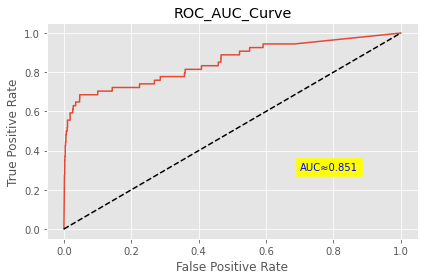

ROC_AUC_Score: 85.11%


In [ ]:
# # Show a precision and recall metrics
# print("Recall Score","{:.2%}".format(recall_score(y_test, y_test_pred)))
# print("Precision Score:","{:.2%}".format((precision_score(y_test, y_test_pred))))

# Check the ROC curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC_Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.text(0.7,0.3,"AUC≈0.851", color="blue", backgroundcolor="yellow")
save_fig("simplednn")
plt.show()

# Print the AUC
print("ROC_AUC_Score:","{:.2%}".format(roc_auc_score(y_test, y_test_pred)))

In [ ]:
y_test_pred_classes = model1.predict_classes(x_test, verbose=0)

In [ ]:
# reduce to 1-d array
y_test_pred_classes = y_test_pred_classes[:,0]
y_test_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
print('Accuracy:', "{:.2%}".format(accuracy_score(y_test, y_test_pred_classes)))

# precision tp / (tp + fp)
print("Precision:", "{:.2%}".format(precision_score(y_test, y_test_pred_classes)))


# recall: tp / (tp + fn)
print("Recall:", "{:.2%}".format(recall_score(y_test, y_test_pred_classes)))

# f1: 2 tp / (2 tp + fp + fn)
print("F1-score:", "{:.2%}".format(f1_score(y_test, y_test_pred_classes)))

Accuracy: 97.78%
Precision: 56.60%
Recall: 55.56%
F1-score: 56.07%


In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
# print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

516/516 [==============================] - 3s 6ms/step - loss: 0.0063 - accuracy: 0.9996
Training Accuracy: 0.9996
67/67 [==============================] - 0s 6ms/step - loss: 0.4250 - accuracy: 0.9759
Testing Accuracy:  0.9759


Saving figure loss_acc


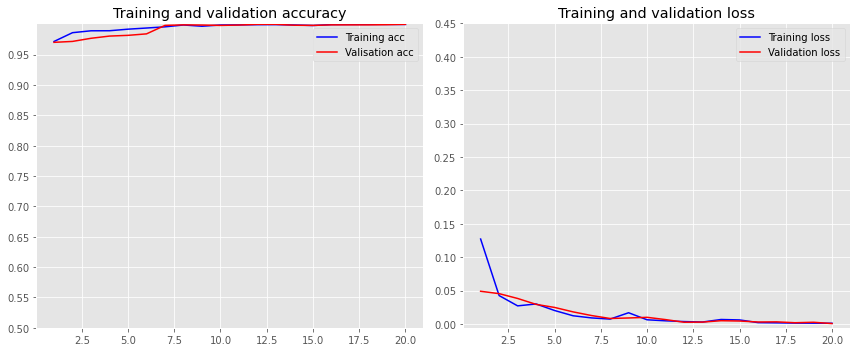

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Valisation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    # set the axis ticks
    my_y_ticks = np.arange(0.5, 1, 0.05)
    # my_x_ticks = np.arange(-2, 2, 0.3)
    # plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    # set the axis ticks
    my_y_ticks = np.arange(0, 0.5, 0.05)
    # my_x_ticks = np.arange(-2, 2, 0.3)
    # plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)

plot_history(history)
save_fig("loss_acc")

In [ ]:
# make sure to call clear_session() before you start training the model again.
from tensorflow.keras.backend import clear_session
clear_session()

#### Conclusion: 

## ***Input Type 2: Word Embeddings***

###***2.1 Train word embeddings during the training of the neural network***

In [ ]:
# We just re-do sentence_train, sentence_test, y_train, y_test from train_test_split
sentences = data1['lemma_str'].values
y = data1['Break Confidentiality?'].values

# Split into train and validation set
sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Use Tokenizer to vectorize a text corpus into a list of integers
# num_words: setting the size of the vocabulary
## Perhaps here i should add oov_token="<OOV>" to represent words not shown up in the word index generated from training dataset
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(sentence_train)

sentence_train = tokenizer.texts_to_sequences(sentence_train)
sentence_test = tokenizer.texts_to_sequences(sentence_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentence_train[2])

[57, 3, 726, 4333, 24, 3, 74, 1, 1216, 146, 56, 113, 24, 177, 578, 123, 129, 150, 29, 246, 376, 3, 92, 222, 53, 18, 29, 34, 14, 311, 194, 84, 34, 14, 16, 215, 141, 32, 310, 531, 14, 86, 311, 890, 664, 34, 14, 12, 317, 181, 103, 61, 862, 48, 664, 606, 14, 1989, 181, 29, 3, 929, 26, 5, 123, 129, 12, 1, 8, 153]


In [ ]:
vocab_size # Maybe the best vocab_size will be no more than 10k

44904

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100 # it is the desired length of sentence you want to keep align with
sentence_train = pad_sequences(sentence_train, padding='post', maxlen=maxlen)
sentence_test = pad_sequences(sentence_test, padding='post', maxlen=maxlen)

print(sentence_train[0, :])

# The resulting feature vector contains few zeros, since you have a fairly long sentence

[   6   39  199    2   97    4   13   12   18   12  876  152  147   33
   11   33   82   49   16   21   22   46    5  270    2   43   48   46
   27   71    6   32  166   71   67   63   80  203  152  140  123  129
    2   36  198   59   59   38  154 1379 1277   54 3462   43   48   46
  116   20   71    6   80  523  280  150   23   36   50  198  115   96
   28   85   38    1   27   54   22 2080    2   43   48  115   48   37
   27   32   67   63   20   36  158   62   28   28   38  154  130   62
   43    6]


In [ ]:
# Smooth the unbalanced data
smo = SMOTE()

# Only need to balance the training data
x_train, y_train = smo.fit_resample(sentence_train, y_train)

# Check again the balance of dataset
print('Counter(y_train)\n',Counter(y_train)) # Employ Counter()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter(y_train)
 Counter({0: 8245, 1: 8245})


In [ ]:
# Change the "sentence_test" to "x_test"
x_test = sentence_test

*   input_dim: the size of the vocabulary
*   output_dim: the size of the dense vector
*   input_length: the length of the sequence










In [ ]:
# Keras Embedding Layer
# In this section, we are going to tell Keras to learn a new embedding space through successive tasks.
def create_model(vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)) # input_dim is not exactly the voc_size

# Take the output of the embedding layer and plug it into a Dense layer. 
# In order to do this you have to add a Flatten layer in between that prepares the sequential input for the Dense layer:

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu')) 
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Define the parameter grid that you want to use in training
param_grid_we = dict(vocab_size=[5000,10000], 
                  embedding_dim=[50,100],
                  maxlen=[100])

# Main settings
epochs = 20

model_we = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=10, verbose=False)
grid_we = RandomizedSearchCV(estimator=model_we, param_distributions=param_grid_we, cv=4, verbose=1, n_iter=5)
grid_we_result = grid_we.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 43.1min finished


In [ ]:
grid_we_result
grid_we_result.best_score_
grid_we_result.best_params_

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09a9004750>,
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'embedding_dim': [50, 100],
                                        'maxlen': [100],
                                        'vocab_size': [5000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

0.9346278309822083

{'embedding_dim': 50, 'maxlen': 100, 'vocab_size': 10000}

In [ ]:
history_we = grid_we.fit(x_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_split=0.2,
                    batch_size=20)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 25.3min finished


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC_AUC_Curve')

Text(0.7, 0.3, 'AUC≈0.784')

Saving figure we


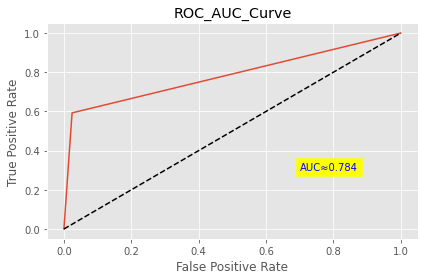

ROC_AUC_Score: 78.42%


In [ ]:
y_test_pred = grid_we.predict(x_test)
y_test_pred

# # Show a precision and recall metrics
# print("Recall Score","{:.2%}".format(recall_score(y_test, y_test_pred)))
# print("Precision Score:","{:.2%}".format((precision_score(y_test, y_test_pred))))

# Check the ROC curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC_Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.text(0.7,0.3,"AUC≈0.784", color="blue", backgroundcolor="yellow")
save_fig("we")
plt.show()

# Print the AUC
print("ROC_AUC_Score:","{:.2%}".format(roc_auc_score(y_test, y_test_pred)))

In [ ]:
# y_test_pred_classes = grid_we.predict_classes(x_test, verbose=0)

# # reduce to 1-d array
# y_test_pred_classes = y_test_pred_classes[:,0]
# y_test_pred_classes

In [ ]:
# accuracy: (tp + tn) / (p + n)
print('Accuracy for test set:', "{:.2%}".format(accuracy_score(y_test, y_test_pred)))
print('Accuracy for train set:', "{:.2%}".format(accuracy_score(y_train, grid_we.predict(x_train))))
# precision tp / (tp + fp)
print("Precision:", "{:.2%}".format(precision_score(y_test, y_test_pred)))


# recall: tp / (tp + fn)
print("Recall:", "{:.2%}".format(recall_score(y_test, y_test_pred)))

# f1: 2 tp / (2 tp + fp + fn)
print("F1-score:", "{:.2%}".format(f1_score(y_test, y_test_pred)))

Accuracy for test set: 96.60%
Accuracy for train set: 97.57%
Precision: 39.02%
Recall: 59.26%
F1-score: 47.06%


In [ ]:
# make sure to call clear_session() before you start training the model again.
from tensorflow.keras.backend import clear_session
clear_session()

#### **Conclusion:** This is typically a not very reliable way to work with sequential data as you can see in the performance. When working with sequential data you want to focus on methods that look at local and sequential information instead of absolute positional information.

### ***2.2 Train word embeddings during the training of the neural network -- using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding.***

In [ ]:
def create_model(vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define the parameter grid that you want to use in training
param_grid_pool = dict(vocab_size=[5000,10000], 
                  embedding_dim=[50,100],
                  maxlen=[100])

In [ ]:
# Main settings
epochs = 20

model_pool = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=50, verbose=False)
grid_pool = RandomizedSearchCV(estimator=model_pool, param_distributions=param_grid_pool, cv=4, verbose=1, n_iter=5)
grid_pool_result = grid_pool.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 17.0min finished


In [ ]:
grid_pool_result
grid_pool_result.best_score_
grid_pool_result.best_params_

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09a8f51490>,
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'embedding_dim': [50, 100],
                                        'maxlen': [100],
                                        'vocab_size': [5000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

0.9613708108663559

{'embedding_dim': 100, 'maxlen': 100, 'vocab_size': 5000}

In [ ]:
# # From the above hyparameter tuning, I finalise the model as follow.
# vocab_size = 10000
# embedding_dim = 100
# maxlen = 100

# model_pooling = Sequential()
# model_pooling.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model_pooling.add(layers.GlobalMaxPooling1D())
# model_pooling.add(layers.Dense(10, activation='relu'))
# model_pooling.add(layers.Dense(1, activation='sigmoid'))
# model_pooling.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_pool = grid_pool.fit(x_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_split=0.2,
                    batch_size=50)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 28.0min finished


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC_AUC_Curve')

Text(0.7, 0.3, 'AUC≈0.818')

Saving figure pool


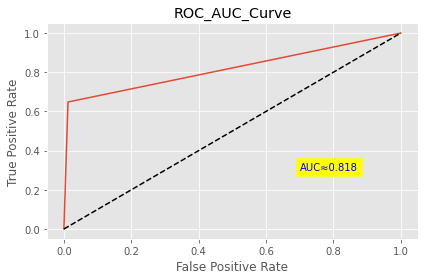

ROC_AUC_Score: 81.80%


In [ ]:
y_test_pred = grid_pool.predict(x_test)
y_test_pred

# # Show a precision and recall metrics
# print("Recall Score","{:.2%}".format(recall_score(y_test, y_test_pred)))
# print("Precision Score:","{:.2%}".format((precision_score(y_test, y_test_pred))))

# Check the ROC curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC_Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.text(0.7,0.3,"AUC≈0.818", color="blue", backgroundcolor="yellow")
save_fig("pool")
plt.show()

# Print the AUC
print("ROC_AUC_Score:","{:.2%}".format(roc_auc_score(y_test, y_test_pred)))

In [ ]:
# accuracy: (tp + tn) / (p + n)
print('Accuracy for test set:', "{:.2%}".format(accuracy_score(y_test, y_test_pred)))
print('Accuracy for train set:', "{:.2%}".format(accuracy_score(y_train, grid_pool.predict(x_train))))
# precision tp / (tp + fp)
print("Precision:", "{:.2%}".format(precision_score(y_test, y_test_pred)))


# recall: tp / (tp + fn)
print("Recall:", "{:.2%}".format(recall_score(y_test, y_test_pred)))

# f1: 2 tp / (2 tp + fp + fn)
print("F1-score:", "{:.2%}".format(f1_score(y_test, y_test_pred)))

Accuracy for test set: 97.92%
Accuracy for train set: 99.35%
Precision: 58.33%
Recall: 64.81%
F1-score: 61.40%


In [ ]:
# make sure to call clear_session() before you start training the model again.
from tensorflow.keras.backend import clear_session
clear_session()

### ***2.3 Using Pretrained Word Embeddings***

#### **Use a precomputed embedding space that utilizes a much larger corpus.**

In [ ]:
# import numpy as np

# # Pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors.
# def create_embedding_matrix(filepath, word_index, embedding_dim):
#     vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
#     embedding_matrix = np.zeros((vocab_size, embedding_dim))

#     with open(filepath) as f:
#         for line in f:
#             word, *vector = line.split()
#             if word in word_index:
#                 idx = word_index[word] 
#                 embedding_matrix[idx] = np.array(
#                     vector, dtype=np.float32)[:embedding_dim]

#     return embedding_matrix


# embedding_dim = 50
# embedding_matrix = create_embedding_matrix('glove.6B.50d.txt',tokenizer.word_index, embedding_dim)

# nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
# print("The percentage of vocabulary that is covered by the pretrained model:{:.2f}".format(nonzero_elements/vocab_size))



# # Using the GlobalMaxPool1D layer
# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, 
#                            weights=[embedding_matrix], 
#                            input_length=maxlen, 
#                            trainable=False))
# model.add(layers.GlobalMaxPool1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     verbose=False,
#                     validation_data=(X_test, y_test),
#                     batch_size=50)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# # loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
# # print("Validation Accuracy:  {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
# # Since the word embeddings are not additionally trained, it is expected to be lower
# # See how this performs if we allow the embedding to be trained by using trainable=True
# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, 
#                            weights=[embedding_matrix], 
#                            input_length=maxlen, 
#                            trainable=True))
# model.add(layers.GlobalMaxPool1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

# history = model.fit(X_train, y_train,
#                     epochs=50,
#                     verbose=False,
#                     validation_data=(X_test, y_test),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

### ***2.4 Convolutional Neural Networks (CNN)***

#### Text is one-dimensional.

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Define the parameter grid that you want to use in training
param_grid_cnn = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000,10000], 
                  embedding_dim=[50, 100, 500],
                  maxlen=[100])

# Main settings
epochs = 20

model_cnn = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=50, verbose=False)
grid_cnn = RandomizedSearchCV(estimator=model_cnn, param_distributions=param_grid_cnn, cv=4, verbose=1, n_iter=5)
grid_cnn_result = grid_cnn.fit(x_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 128.9min finished


In [ ]:
grid_cnn_result
grid_cnn_result.best_score_
grid_cnn_result.best_params_

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f099f7c2410>,
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'embedding_dim': [50, 100, 500],
                                        'kernel_size': [3, 5, 7],
                                        'maxlen': [100],
                                        'num_filters': [32, 64, 128],
                                        'vocab_size': [5000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

0.9885999113321304

{'embedding_dim': 50,
 'kernel_size': 3,
 'maxlen': 100,
 'num_filters': 32,
 'vocab_size': 10000}

In [ ]:
# # Then finalising the model by applying these parameters
# model_cnn = Sequential()
# # model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model_cnn.add(layers.Embedding(5000, 500, input_length = 100))
# # model.add(layers.Embedding(num_filters, kernal_size, activation))
# model_cnn.add(layers.Conv1D(32, 7, activation='relu'))
# model_cnn.add(layers.GlobalMaxPooling1D())
# model_cnn.add(layers.Dense(10, activation='relu'))
# model_cnn.add(layers.Dense(1, activation='sigmoid'))
# model_cnn.compile(optimizer='adam',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

In [ ]:
history_cnn = grid_cnn.fit(x_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_split=0.2,
                    batch_size=50)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 117.9min finished


array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC_AUC_Curve')

Text(0.7, 0.3, 'AUC≈0.839')

Saving figure cnn


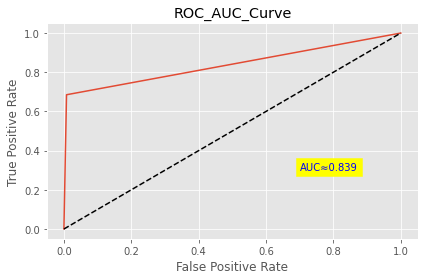

ROC_AUC_Score: 83.87%


In [ ]:
y_test_pred = grid_cnn.predict(x_test).ravel()
y_test_pred

# # Show a precision and recall metrics
# print("Recall Score","{:.2%}".format(recall_score(y_test, y_test_pred)))
# print("Precision Score:","{:.2%}".format((precision_score(y_test, y_test_pred))))

# Check the ROC curve
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC_Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.text(0.7,0.3,"AUC≈0.839", color="blue", backgroundcolor="yellow")
save_fig("cnn")
plt.show()

# Print the AUC
print("ROC_AUC_Score:","{:.2%}".format(roc_auc_score(y_test, y_test_pred)))

In [ ]:
# accuracy: (tp + tn) / (p + n)
print('Accuracy for test set:', "{:.2%}".format(accuracy_score(y_test, y_test_pred)))
print('Accuracy for train set:', "{:.2%}".format(accuracy_score(y_train, grid_cnn.predict(x_train))))
# precision tp / (tp + fp)
print("Precision:", "{:.2%}".format(precision_score(y_test, y_test_pred)))


# recall: tp / (tp + fn)
print("Recall:", "{:.2%}".format(recall_score(y_test, y_test_pred)))

# f1: 2 tp / (2 tp + fp + fn)
print("F1-score:", "{:.2%}".format(f1_score(y_test, y_test_pred)))

Accuracy for test set: 98.44%
Accuracy for train set: 99.83%
Precision: 69.81%
Recall: 68.52%
F1-score: 69.16%


In [ ]:
# make sure to call clear_session() before you start training the model again.
from tensorflow.keras.backend import clear_session
clear_session()

### ***2.5 Recurrent Neural Networks***

The main advantage to use RNN for text data is that it reduces the number of parameters of the model and it **shares weights between different positions** of the text.

See next notebook for RNN training.
